In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/aryellewright/Documents/Kumar-Biomaterials-Lab/Zeta-Potential_Plots/1016_ZetaPotentialData.xlsx')

In [3]:
# df_sorted = df.sort_values(by='Zeta Potential', ascending=False)
# polymer = df_sorted["Polymer"]
# zeta = df_sorted['Zeta Potential']
# stdev = df_sorted['Stdev']

In [4]:
# saving variables for plotting
polymer = df["Polymer"]
zeta = df['Zeta Potential']
stdev = df['Stdev']

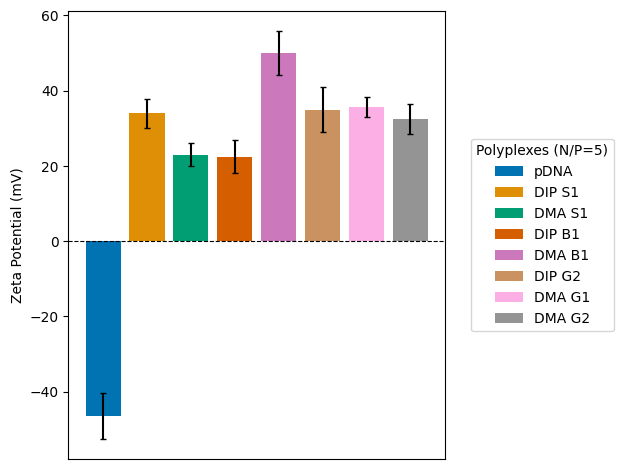

In [5]:
# Generate colorblind-friendly colors
num_polymer = polymer.nunique()
colors = sns.color_palette("colorblind", num_polymer)

# Map each polymer to a color
polymer_to_color = dict(zip(polymer.unique(), colors))

# Plot bars individually to set color and label for each polymer
for p in polymer.unique():
    plt.bar(p, zeta[polymer == p].values[0], 
            yerr=stdev[polymer == p].values[0], 
            capsize=2, 
            color=polymer_to_color[p], 
            label=p)

plt.ylabel('Zeta Potential (mV)')
plt.xticks([])
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
#plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', title='Polyplexes (N/P=5)')
plt.tight_layout()
plt.show()
